<a href="https://colab.research.google.com/github/benedictawinni/Lifestyle-and-Wellbeing-Analysis/blob/main/Work%20Life%20Balance%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 5.1 MB/s 
     |████████████████████████████████| 1.1 MB 32.0 MB/s 
     |████████████████████████████████| 18.2 MB 770 kB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=415ab9cd8fd2a5a220decdb9c34eda3ef04ada248e7882c868a7126b84abc6a4
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=98e6e6d64e14030f54e8341b61c903529f1a89af486e667a6dbf614ee37e2759
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59438 sha256=0d429a69d323e1ba20225c2ba702921b0e2a480da7035e5323

In [ ]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as st
from sklearn import cluster
from sklearn.cluster import KMeans
from umap import UMAP
import umap

import warnings; warnings.simplefilter('ignore')

# Import Dataset

In [ ]:
df = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [ ]:
df.shape

(15972, 24)

## Data Understanding

This dataset contains 15,977 survey responses with 24 attributes describing how we live our lives. This survey was collected in 2015 until 14 March 2021.

Your Work-Life Balance survey evaluates how we thrive in both your professional and personal lives: it reflects how well you shape your lifestyle, habits and behaviors to maximize your overall life satisfaction along the following five dimensions:
1. **Healthy body**, reflecting your fitness and healthy habits;
2. **Healthy mind**, indicating how well you embrace positive emotions;
3. **Expertise**, measuring the ability to grow your expertise and achieve something unique;
4. **Connection**, assessing the strength of your social network and your inclination to discover the world;
5. **Meaning**, evaluating your compassion, generosity and how much 'you are living the life of your dream'.

Source: https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

## Use Case

Objectives:
- Which attributes have high correlation to work life balance score?
- How many people who experience much stress every day based on age?
- Is gender significantly affect work life balance?
- Is age significantly affect work life balance?
- Is there any work life balance score's trend between 2015 to 2021?
- Can we cluster respondents based on their behaviour and work life balance score?

Methodology:
- Exploratory Data Analysis (EDA)
- Clustering Analysis (K-Means ++) and Elbow Method

Expected Outcome:<br>
Give recommendations how to achieve work-life balance.

# Data Pre-Processing

In [ ]:
# Change columns' name to be lowercase
df.columns = df.columns.str.lower()
df.head()

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                15972 non-null  object 
 1   fruits_veggies           15972 non-null  int64  
 2   daily_stress             15972 non-null  object 
 3   places_visited           15972 non-null  int64  
 4   core_circle              15972 non-null  int64  
 5   supporting_others        15972 non-null  int64  
 6   social_network           15972 non-null  int64  
 7   achievement              15972 non-null  int64  
 8   donation                 15972 non-null  int64  
 9   bmi_range                15972 non-null  int64  
 10  todo_completed           15972 non-null  int64  
 11  flow                     15972 non-null  int64  
 12  daily_steps              15972 non-null  int64  
 13  live_vision              15972 non-null  int64  
 14  sleep_hours           

In [ ]:
df['daily_stress'].value_counts()

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: daily_stress, dtype: int64

Note: There is 1 noise data, that is '1/1/00'. It will be dropped from data

In [ ]:
# Drop noise data in daily_sress
df.drop(df[df['daily_stress']=='1/1/00'].index, inplace=True)

In [ ]:
# Change data types
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['daily_stress'] = df['daily_stress'].astype('category')
df['bmi_range'] = df['bmi_range'].astype('category')
df['todo_completed'] = df['todo_completed'].astype('category')
df['daily_steps'] = df['daily_steps'].astype('category')
df['sufficient_income'] = df['sufficient_income'].astype('category')
df['age'] = df['age'].astype('category')
df['gender'] = df['gender'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                15971 non-null  datetime64[ns]
 1   fruits_veggies           15971 non-null  int64         
 2   daily_stress             15971 non-null  category      
 3   places_visited           15971 non-null  int64         
 4   core_circle              15971 non-null  int64         
 5   supporting_others        15971 non-null  int64         
 6   social_network           15971 non-null  int64         
 7   achievement              15971 non-null  int64         
 8   donation                 15971 non-null  int64         
 9   bmi_range                15971 non-null  category      
 10  todo_completed           15971 non-null  category      
 11  flow                     15971 non-null  int64         
 12  daily_steps              15971 n

In [ ]:
df.isnull().sum()

timestamp                  0
fruits_veggies             0
daily_stress               0
places_visited             0
core_circle                0
supporting_others          0
social_network             0
achievement                0
donation                   0
bmi_range                  0
todo_completed             0
flow                       0
daily_steps                0
live_vision                0
sleep_hours                0
lost_vacation              0
daily_shouting             0
sufficient_income          0
personal_awards            0
time_for_passion           0
weekly_meditation          0
age                        0
gender                     0
work_life_balance_score    0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fruits_veggies,15971.0,2.922672,1.442739,0.0,2.0,3.0,4.0,5.0
places_visited,15971.0,5.233235,3.311847,0.0,2.0,5.0,8.0,10.0
core_circle,15971.0,5.508296,2.840287,0.0,3.0,5.0,8.0,10.0
supporting_others,15971.0,5.616179,3.241937,0.0,3.0,5.0,9.5,10.0
social_network,15971.0,6.474047,3.086643,0.0,4.0,6.0,10.0,10.0
achievement,15971.0,4.000689,2.755912,0.0,2.0,3.0,6.0,10.0
donation,15971.0,2.715171,1.851556,0.0,1.0,3.0,5.0,5.0
flow,15971.0,3.194477,2.357285,0.0,1.0,3.0,5.0,10.0
live_vision,15971.0,3.752176,3.231083,0.0,1.0,3.0,5.0,10.0
sleep_hours,15971.0,7.042953,1.199053,1.0,6.0,7.0,8.0,10.0


In [ ]:
df.select_dtypes('category').describe()

,daily_stress,bmi_range,todo_completed,daily_steps,sufficient_income,age,gender
count,15971,15971,15971,15971,15971,15971,15971
unique,6,2,11,10,2,4,2
top,3,1,8,10,2,21 to 35,Female
freq,4398,9413,2587,2700,11642,6107,9858


Note:
- All values ​​and data types are in accordance with the contents of the survey
- Most respondents have BMI less than 25
- Most respondents tend to experience quite stress
- Most respondents complete 8 to-do lists in a week
- Most respondents have an average of 1000 steps per day
- Most respondents have sufficient income
- Most respondents are 21 to 35 years old
- This survey is dominant with female respondents
- No missing values in the data


In [ ]:
# Check duplicates value
df.duplicated().sum()

482

There are 482 duplicates value, which is shown below.

In [ ]:
df[df.duplicated()].head(10)

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,sleep_hours,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score
77,2015-07-20,5,2,10,1,4,5,0,5,1,...,8,0,6,2,10,1,6,36 to 50,Female,694.0
82,2015-07-20,0,5,0,2,0,0,3,0,2,...,6,10,10,1,2,1,10,21 to 35,Male,538.8
89,2015-07-20,5,0,8,3,10,7,6,3,1,...,8,0,1,2,10,5,10,36 to 50,Female,749.7
115,2015-07-23,5,2,10,7,4,3,5,2,1,...,9,8,3,2,10,5,10,Less than 20,Female,709.4
120,2015-07-24,1,2,6,8,4,5,2,1,1,...,10,0,3,2,1,2,4,21 to 35,Female,665.3
164,2015-07-27,3,2,2,10,6,6,4,5,2,...,7,4,2,2,10,4,3,51 or more,Male,683.7
180,2015-07-29,5,1,9,4,2,4,6,1,1,...,8,3,3,2,10,3,7,Less than 20,Male,680.5
209,2015-07-31,3,1,10,3,10,3,3,3,2,...,8,0,1,1,5,5,10,36 to 50,Male,677.0
212,2015-07-31,1,1,3,4,10,10,4,3,1,...,6,0,2,2,5,5,10,21 to 35,Male,727.6
223,2015-08-01,2,5,2,2,10,10,3,1,2,...,10,10,3,2,10,2,7,36 to 50,Male,639.0


These duplicates will be dropped and we will keep the first response from each respondents.

In [ ]:
# Drop duplicates and keep the first response
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Check duplicates value
df.duplicated().sum()

0

Solved!

# Exploratory Data Analysis (EDA)

## Detecting and Handling Outliers

In [ ]:
numeric = ['fruits_veggies', 'places_visited', 'core_circle', 'supporting_others', 'social_network',
           'achievement', 'donation', 'flow', 'live_vision', 'sleep_hours', 'lost_vacation', 'daily_shouting',
           'personal_awards', 'time_for_passion', 'weekly_meditation', 'work_life_balance_score']

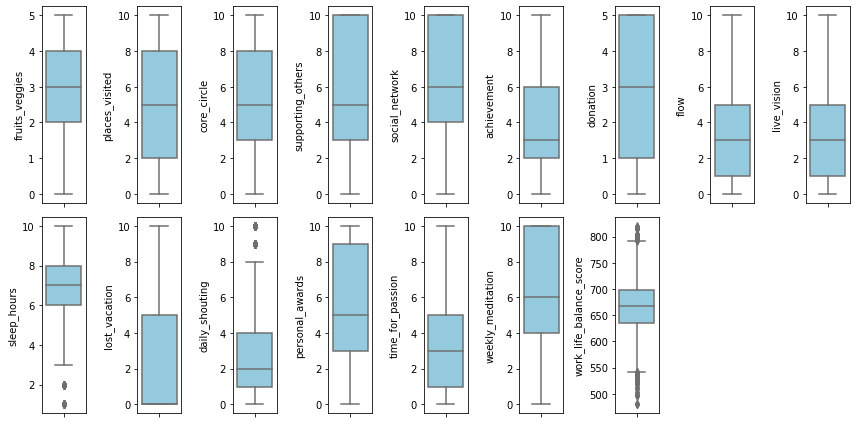

In [ ]:
# Adjust the figure size
plt.figure(figsize=(12,6))

# Make boxplot
features = numeric
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Note: Outliers are detected in `sleep_hours`, `lost_vacation`, and `work_life_balance_score`. For further analysis, we will check the outliers in `work_life_balance_score`.

In [ ]:
# Function to check outliers
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [ ]:
# Find outliers
df['outlier_wlb'] = check_outlier(data=df, column='work_life_balance_score')
df[df['outlier_wlb'] == 'outlier']

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score,outlier_wlb
72,2015-07-19 00:00:00,0,4,0,2,2,3,1,0,2,...,0,10,1,1,0,0,36 to 50,Female,528.8,outlier
79,2015-07-20 00:00:00,0,5,0,2,0,0,3,0,2,...,10,10,1,2,1,10,21 to 35,Male,538.8,outlier
420,2015-08-20 00:00:00,5,1,10,10,10,10,10,5,1,...,0,0,2,10,6,10,51 or more,Female,799.0,outlier
872,2015-09-22 00:00:00,1,4,0,3,2,1,0,0,2,...,0,9,1,2,0,3,21 to 35,Female,533.3,outlier
1203,2015-10-18 00:00:00,0,5,0,1,0,1,0,1,2,...,9,10,1,0,0,0,51 or more,Female,496.1,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,2020-10-07 03:58:00,2,5,0,1,1,0,1,0,2,...,10,10,1,2,1,0,36 to 50,Female,504.2,outlier
15071,2020-10-25 04:16:00,1,5,0,0,2,2,0,1,2,...,10,7,1,2,2,0,21 to 35,Female,518.6,outlier
15239,2020-11-14 18:18:00,5,1,10,10,10,10,10,5,1,...,0,0,2,10,10,10,51 or more,Male,804.3,outlier
15242,2020-11-15 04:48:00,5,0,10,10,10,10,10,5,1,...,0,0,2,10,10,10,51 or more,Male,814.5,outlier


There are 67 outliers in `work_life_balance_score`. We will do the descriptive analysis for these outliers. Moreover, in the next analysis, we will exclude the ouliers from data.

In [ ]:
# Split the dataset
df_outlier = df[df['outlier_wlb'] == 'outlier']
df_not_outlier = df[df['outlier_wlb'] == 'not-outlier']

In [ ]:
# Drop `outlier_wlb` column because it is no longer be used
df_outlier.drop('outlier_wlb', axis=1, inplace=True)
df_not_outlier.drop('outlier_wlb', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Descriptive statistics for outlier data
df_outlier.describe(include='all').transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,67,62,2016-03-22 00:00:00,3,2015-07-19,2021-02-24 22:07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fruits_veggies,67.0,NaN,NaN,NaN,NaT,NaT,2.089552,2.115823,0.0,0.0,1.0,5.0,5.0
daily_stress,67,6,5,34,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
places_visited,67.0,NaN,NaN,NaN,NaT,NaT,3.507463,4.547304,0.0,0.0,1.0,10.0,10.0
core_circle,67.0,NaN,NaN,NaN,NaT,NaT,3.970149,4.213867,0.0,0.5,2.0,10.0,10.0
supporting_others,67.0,NaN,NaN,NaN,NaT,NaT,4.029851,4.393418,0.0,0.0,2.0,10.0,10.0
social_network,67.0,NaN,NaN,NaN,NaT,NaT,4.164179,4.255467,0.0,1.0,2.0,10.0,10.0
achievement,67.0,NaN,NaN,NaN,NaT,NaT,3.58209,4.569826,0.0,0.0,1.0,10.0,10.0
donation,67.0,NaN,NaN,NaN,NaT,NaT,1.835821,2.199153,0.0,0.0,1.0,5.0,5.0
bmi_range,67.0,2.0,2.0,45.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note:
- These outliers have greater mean score in `flow`, `live_vision`, `lost_vacation`, and `daily_shouting` compared to most respondents. Yet, they have lower mean score in other numericsl attributes.
- Most respondents in this data outlier have BMI more than 25
- Most respondents in this data outlier tend to experience less stress than most respondents
- Most respondents in this data outlier complete 0 to-do lists in a week which is worse than most respondents
- Most respondents in this data outlier have an average of below 1000 steps per day. It is the same with most respondents
- Most respondents in this data outlier also have sufficient income and are dominated with females
- Most respondents in this data outlier are 36 to 50 years old

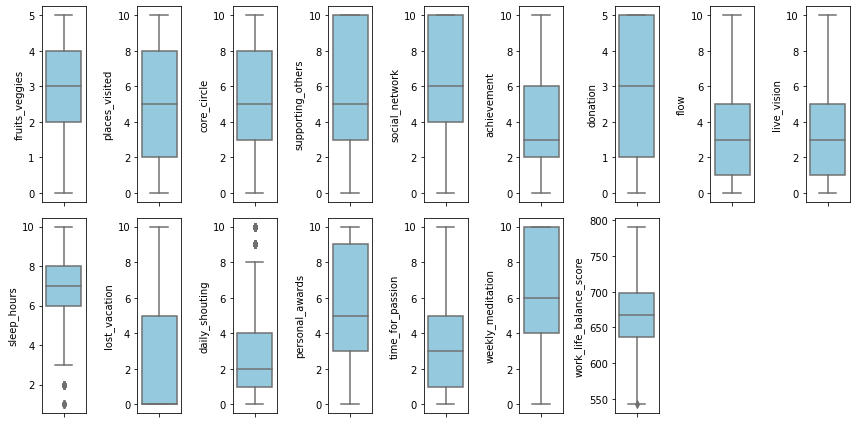

In [ ]:
# Copy data non-outlier to df
df = df_not_outlier.copy()

# Adjust the figure size
plt.figure(figsize=(12,6))

# Make boxplot
features = numeric
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Note: Outliers are still detected in `sleep_hours` and `daily_shouting`. These will be further analyzed (same as above).

In [ ]:
# Find outliers
df['outlier_sh'] = check_outlier(data=df, column='sleep_hours')
df[df['outlier_sh'] == 'outlier']

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score,outlier_sh
738,2015-09-08 00:00:00,1,3,0,4,10,10,0,1,2,...,10,2,2,3,0,2,51 or more,Male,585.8,outlier
1904,2015-12-13 00:00:00,0,4,0,5,7,3,1,5,1,...,0,10,1,2,0,2,36 to 50,Male,592.3,outlier
2572,2016-02-25 00:00:00,5,3,8,3,4,7,9,2,1,...,8,5,2,3,2,10,Less than 20,Male,673.9,outlier
2968,2016-03-22 00:00:00,0,2,3,5,2,0,3,3,1,...,8,7,1,6,9,5,Less than 20,Male,606.0,outlier
2986,2016-03-22 00:00:00,0,0,0,7,0,0,0,0,1,...,0,0,2,0,0,0,51 or more,Female,576.9,outlier
3436,2016-04-25 00:00:00,3,3,6,6,7,3,5,0,1,...,6,0,2,6,0,4,Less than 20,Male,644.0,outlier
3611,2016-05-08 00:00:00,2,2,5,3,6,2,5,4,2,...,4,2,1,7,5,9,21 to 35,Male,633.6,outlier
3785,2016-05-28 00:00:00,5,0,5,4,10,10,10,5,1,...,0,0,2,10,10,10,51 or more,Female,768.5,outlier
4380,2016-09-05 00:00:00,3,4,10,5,3,3,2,0,1,...,0,1,2,4,0,5,36 to 50,Male,638.9,outlier
5712,2017-02-09 00:00:00,5,3,10,3,8,2,10,5,2,...,5,10,2,10,1,10,51 or more,Female,669.9,outlier


In [ ]:
# Split the dataset
df_outlier = df[df['outlier_sh'] == 'outlier']
df_not_outlier = df[df['outlier_sh'] == 'not-outlier']

# Drop `outlier_wlb` column because it is no longer be used
df_outlier.drop('outlier_sh', axis=1, inplace=True)
df_not_outlier.drop('outlier_sh', axis=1, inplace=True)

# Descriptive statistics for outlier data
df_outlier.describe(include='all').transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  # Remove the CWD from sys.path while we load stuff.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,29,27,2016-03-22 00:00:00,2,2015-09-08,2020-11-27 13:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fruits_veggies,29.0,NaN,NaN,NaN,NaT,NaT,2.241379,1.724926,0.0,1.0,2.0,3.0,5.0
daily_stress,29,6,3,10,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
places_visited,29.0,NaN,NaN,NaN,NaT,NaT,3.068966,3.092976,0.0,0.0,3.0,5.0,10.0
core_circle,29.0,NaN,NaN,NaN,NaT,NaT,4.586207,2.847521,0.0,3.0,5.0,6.0,10.0
supporting_others,29.0,NaN,NaN,NaN,NaT,NaT,4.344828,3.548399,0.0,1.0,4.0,7.0,10.0
social_network,29.0,NaN,NaN,NaN,NaT,NaT,4.344828,3.265358,0.0,2.0,4.0,6.0,10.0
achievement,29.0,NaN,NaN,NaN,NaT,NaT,3.586207,3.122696,0.0,1.0,3.0,5.0,10.0
donation,29.0,NaN,NaN,NaN,NaT,NaT,2.034483,1.898924,0.0,0.0,1.0,3.0,5.0
bmi_range,29.0,2.0,1.0,16.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note:
- There are 29 outliers in `sleep_hours`.
- Most respondents in this data outlier (sleep_hours) tend to experience less stress than the data outlier (work_life_balance_score)

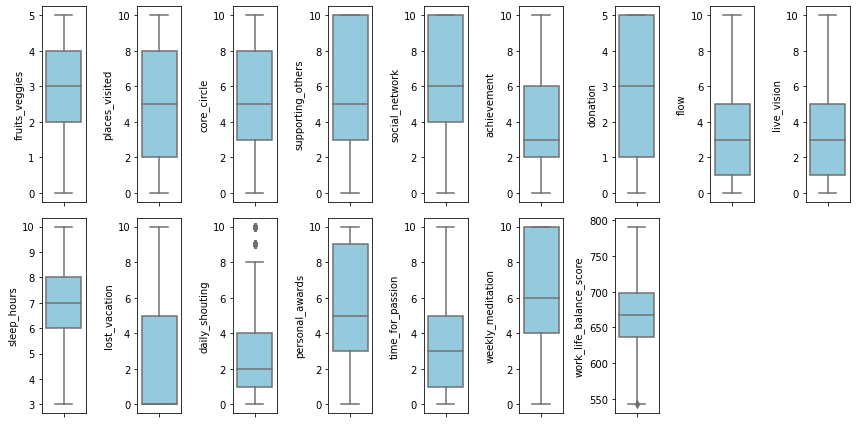

In [ ]:
# Copy data non-outlier to df
df = df_not_outlier.copy()

# Adjust the figure size
plt.figure(figsize=(12,6))

# Make boxplot
features = numeric
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='skyblue')
    plt.tight_layout()

Note: Outliers are still detected in `daily_shouting`. These will be further analyzed (same as above).

In [ ]:
# Find outliers
df['outlier_ds'] = check_outlier(data=df, column='daily_shouting')
df[df['outlier_ds'] == 'outlier']

,timestamp,fruits_veggies,daily_stress,places_visited,core_circle,supporting_others,social_network,achievement,donation,bmi_range,...,lost_vacation,daily_shouting,sufficient_income,personal_awards,time_for_passion,weekly_meditation,age,gender,work_life_balance_score,outlier_ds
32,2015-07-14 00:00:00,0,5,0,3,3,8,1,5,2,...,10,10,2,3,2,1,36 to 50,Female,574.5,outlier
37,2015-07-15 00:00:00,2,5,1,8,5,2,2,5,2,...,7,10,1,2,0,10,36 to 50,Female,593.7,outlier
90,2015-07-20 00:00:00,3,4,4,7,4,4,10,5,2,...,0,9,2,7,1,10,36 to 50,Female,676.4,outlier
91,2015-07-20 00:00:00,3,4,1,4,2,5,2,2,2,...,7,10,2,2,0,10,21 to 35,Female,594.8,outlier
117,2015-07-24 00:00:00,2,5,0,10,3,2,4,1,1,...,0,10,2,10,3,10,51 or more,Female,643.5,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15761,2021-02-25 03:04:00,2,4,0,5,0,2,3,0,1,...,10,10,2,3,5,10,21 to 35,Female,609.5,outlier
15767,2021-02-25 10:46:00,2,5,3,3,7,4,5,4,1,...,7,9,2,7,8,10,Less than 20,Female,658.2,outlier
15805,2021-03-01 13:21:00,0,5,5,6,0,0,0,0,1,...,10,10,2,2,0,10,21 to 35,Male,567.7,outlier
15826,2021-03-02 22:30:00,3,4,3,9,8,4,5,2,2,...,4,10,1,8,0,3,21 to 35,Female,603.4,outlier


In [ ]:
# Split the dataset
df_outlier = df[df['outlier_ds'] == 'outlier']
df_not_outlier = df[df['outlier_ds'] == 'not-outlier']

# Drop `outlier_wlb` column because it is no longer be used
df_outlier.drop('outlier_ds', axis=1, inplace=True)
df_not_outlier.drop('outlier_ds', axis=1, inplace=True)

# Descriptive statistics for outlier data
df_outlier.describe(include='all').transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  # Remove the CWD from sys.path while we load stuff.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
timestamp,866,712,2016-03-22 00:00:00,17,2015-07-14,2021-03-06 12:46:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fruits_veggies,866.0,NaN,NaN,NaN,NaT,NaT,2.681293,1.543975,0.0,1.0,3.0,4.0,5.0
daily_stress,866,6,5,303,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
places_visited,866.0,NaN,NaN,NaN,NaT,NaT,4.549654,3.439714,0.0,2.0,4.0,7.0,10.0
core_circle,866.0,NaN,NaN,NaN,NaT,NaT,5.066975,3.007143,0.0,3.0,5.0,7.0,10.0
supporting_others,866.0,NaN,NaN,NaN,NaT,NaT,5.281755,3.47863,0.0,2.0,5.0,10.0,10.0
social_network,866.0,NaN,NaN,NaN,NaT,NaT,6.322171,3.253298,0.0,3.25,6.0,10.0,10.0
achievement,866.0,NaN,NaN,NaN,NaT,NaT,3.457275,2.851005,0.0,1.0,3.0,5.0,10.0
donation,866.0,NaN,NaN,NaN,NaT,NaT,2.583141,1.990879,0.0,1.0,2.0,5.0,5.0
bmi_range,866.0,2.0,1.0,480.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note:
- There are 866 outliers in `daily_shouting`.
- From the descriptive analysis, we can infer that the `daily_shouting` score tend to in line with more `stress` and it is dominated by 21 to 25 years old's respondents.

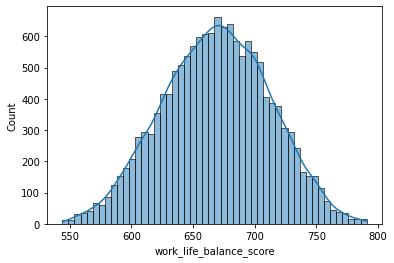

In [ ]:
# Copy data non-outlier to df
df = df_not_outlier.copy()

# Histogram for work_life_balance_score
sns.histplot(df['work_life_balance_score'], kde=True)

Note: The `work_life_balance_score` has normal distribution.

## Which attributes have high correlation to work life balance score?

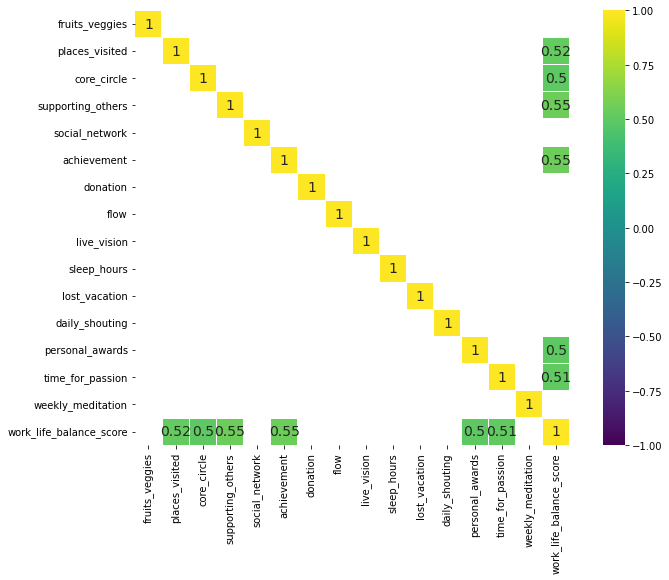

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Attributes that have quite high correlation (more than 0.5) to work life balance score are `places_visited`, `core_circle`, `supporting_others`, `achievement`, `personal_awards`, and `time_for_passion`. These attributes have positive correlation which mean the higher score in attributes will contribute to the higher score in work life balance.

## Does stress and gender attributes affect work life balance score?

In [ ]:
df_stress_age = df.groupby(['daily_stress','gender']).agg(
    mean_wlb = ('work_life_balance_score','mean')
).reset_index()

df_stress_age

,daily_stress,gender,mean_wlb
0,0,Female,699.223827
1,0,Male,691.357101
2,1,Female,693.129473
3,1,Male,680.533634
4,2,Female,679.553023
5,2,Male,674.084402
6,3,Female,671.445420
7,3,Male,662.605241
8,4,Female,657.282294
9,4,Male,647.970734


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 48.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.7% of the points cannot be placed; y

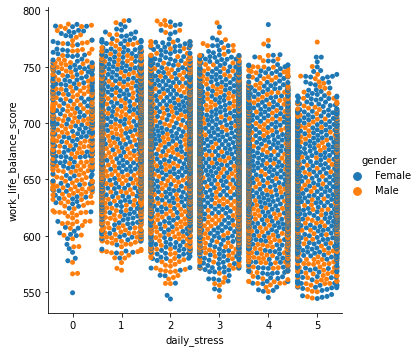

In [ ]:
sns.catplot(x='daily_stress', y='work_life_balance_score', hue='gender',
            kind='swarm', data=df)

In general, females have higher work life balance score than males. Besides, more stress tend to make the work life balance score decrease. So, we can infer from this plot that stress and gender attributes are contributing in affecting work life balance score.

## Does gender significantly affect work life balance score?

H0 : Gender significantly affects work life balance score <br>
H1 : Gender does not significantly affect work life balance score

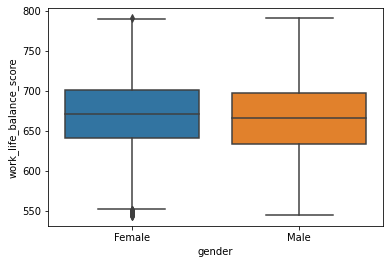

In [ ]:
sns.boxplot(x=df['gender'], y=df['work_life_balance_score'])

In [ ]:
df.groupby('gender').agg(
    mean_wlb = ('work_life_balance_score','mean')
).reset_index()

,gender,mean_wlb
0,Female,670.705972
1,Male,665.951293


In [ ]:
# Splitting dataset
female = df[df['gender']=='Female']
male = df[df['gender']=='Male']

# T-Test
ttest = st.ttest_ind(a = female['work_life_balance_score'],
                     b = male['work_life_balance_score'],
                     alternative='greater')

p_value = ttest.pvalue
print('P-Value :',p_value)
if p_value >= 0.05:
    print('Gender does not significantly affect work life balance score')
else:
    print('Gender significantly affects work life balance score')

P-Value : 6.362527707972241e-11
Gender significantly affects work life balance score


Based on given p-value from T-Test, we can say that gender significantly affects work life balance score.

## Does age significantly affect work life balance score?

H0 : Age significantly affects work life balance score <br>
H1 : Age does not significantly affect work life balance score

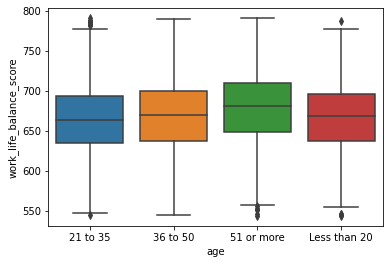

In [ ]:
sns.boxplot(x=df['age'], y=df['work_life_balance_score'])

In [ ]:
df.groupby('age').agg(
    mean_wlb = ('work_life_balance_score','mean')
).reset_index().sort_values('mean_wlb')

,age,mean_wlb
0,21 to 35,663.350380
3,Less than 20,666.845802
1,36 to 50,669.204354
2,51 or more,679.099529


In [ ]:
# Splitting Dataset
df_less20 = df[df['age'] == 'Less than 20']
df_21to35 = df[df['age'] == '21 to 35']
df_36to50 = df[df['age'] == '36 to 50']
df_36to50 = df[df['age'] == '51 or more']

# ANOVA Test
anova_test = st.f_oneway(df_less20['work_life_balance_score'],
                         df_21to35['work_life_balance_score'],
                         df_36to50['work_life_balance_score'],
                         df_36to50['work_life_balance_score']
                         )

print('P-Value :',anova_test.pvalue)

if anova_test.pvalue>0.05:
    print('Age does not significantly affect work life balance score')
else:
    print('Age significantly affects work life balance score')

P-Value : 4.007173569727249e-89
Age significantly affects work life balance score


Based on given p-value from ANOVA Test, we can say that age significantly affects work life balance score.

## Is there any work life balance score's trend between 2015 to 2021?

In [ ]:
# Extracting Year
df['year'] = df['timestamp'].dt.year

Text(0.5, 1.0, 'Line Chart of Work Live Balance Score between 2015 to 2021')

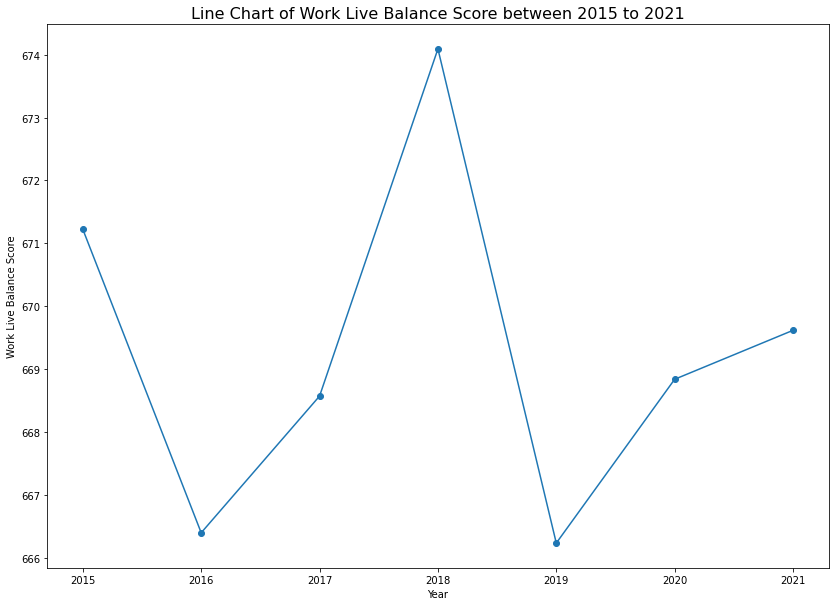

In [ ]:
# Adjust the figure size
fig = plt.figure(figsize = (14, 10))

df_year = df.groupby('year').agg(
    mean_wlb = ('work_life_balance_score','mean')
).reset_index()

# Line chart
plt.plot(df_year['year'], df_year['mean_wlb'], marker='o')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Work Live Balance Score')
plt.title('Line Chart of Work Live Balance Score between 2015 to 2021', fontsize = 16)

From this plot, the work life balance score reaches the highest peak in 2018 and reaches the lowest ground in 2019. During the pandemic (2020 to 2021), the work life balance score tends to increase. Reminiscing about the pandemic when most companies and governments decided to change the way of working from Work From Office (WFO) to Work From Home (WFH), most people tended to have more flexible working hours which might be one of the reasons why the work life balance score was increasing during pandemic.

# Clustering Analysis

In clustering analysis, we will only use attributes that have quite high correlation to work life balance score: `places_visited`, `supporting_others`, and `time_for_passion`. We also add `daily_stress` that tend to have impact to work life balance score.

In [ ]:
df_cluster = df.copy()
df_cluster = df[['places_visited','supporting_others','time_for_passion','daily_stress','work_life_balance_score']]

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14527 entries, 0 to 15971
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   places_visited           14527 non-null  int64   
 1   supporting_others        14527 non-null  int64   
 2   time_for_passion         14527 non-null  int64   
 3   daily_stress             14527 non-null  category
 4   work_life_balance_score  14527 non-null  float64 
dtypes: category(1), float64(1), int64(3)
memory usage: 1.1 MB


In [ ]:
# One-hot encoding for gender
df_cluster = df_cluster.join(pd.get_dummies(df_cluster['gender'], prefix='gender'))
df_cluster.drop('gender', axis=1, inplace=True)
df_cluster.head()

,places_visited,time_for_passion,daily_stress,age,work_life_balance_score,gender_Female,gender_Male
0,2,0,2,36 to 50,609.5,1,0
1,4,2,3,36 to 50,655.6,1,0
2,3,8,3,36 to 50,631.6,1,0
3,10,2,3,51 or more,622.7,1,0
4,3,1,1,51 or more,663.9,1,0


In [ ]:
# Define rank
age_dictionary = {
    'Less than 20':1,
    '21 to 35':2,
    '36 to 50':3,
    '51 or more':4
}

# Rank encoding for age
df_cluster['age_rank'] = df_cluster['age'].map(age_dictionary)
df_cluster.drop('age', axis=1, inplace=True)
df_cluster.head()

,places_visited,time_for_passion,daily_stress,work_life_balance_score,gender_Female,gender_Male,age_rank
0,2,0,2,609.5,1,0,3
1,4,2,3,655.6,1,0,3
2,3,8,3,631.6,1,0,3
3,10,2,3,622.7,1,0,4
4,3,1,1,663.9,1,0,4


In [ ]:
df_cluster['daily_stress'] = df_cluster['daily_stress'].astype('int64')

In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14527 entries, 0 to 15971
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   places_visited           14527 non-null  int64  
 1   supporting_others        14527 non-null  int64  
 2   time_for_passion         14527 non-null  int64  
 3   daily_stress             14527 non-null  int64  
 4   work_life_balance_score  14527 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.2 MB


In [ ]:
# Standardization
df_cluster['place_visited_stand'] = (df_cluster["places_visited"] - df_cluster["places_visited"].mean()) / df_cluster["places_visited"].std()
df_cluster['supporting_others_stand'] = (df_cluster["supporting_others"] - df_cluster["supporting_others"].mean()) / df_cluster["supporting_others"].std()
df_cluster['time_for_passion_stand'] = (df_cluster["time_for_passion"] - df_cluster["time_for_passion"].mean()) / df_cluster["time_for_passion"].std()
df_cluster['daily_stress_stand'] = (df_cluster["daily_stress"] - df_cluster["daily_stress"].mean()) / df_cluster["daily_stress"].std()

In [ ]:
df_cluster.head()

,places_visited,supporting_others,time_for_passion,daily_stress,work_life_balance_score,place_visited_stand,supporting_others_stand,time_for_passion_stand,daily_stress_stand
0,2,0,0,2,609.5,-0.995276,-1.754522,-1.237678,-0.545555
1,4,8,2,3,655.6,-0.388151,0.730107,-0.500108,0.194987
2,3,4,8,3,631.6,-0.691714,-0.512208,1.712603,0.194987
3,10,10,2,3,622.7,1.433224,1.351264,-0.500108,0.194987
4,3,10,1,1,663.9,-0.691714,1.351264,-0.868893,-1.286097


In [ ]:
# Define attributes X
X = df_cluster[['place_visited_stand','supporting_others_stand',
                'time_for_passion_stand','daily_stress_stand']].values

## Choosing Initial Cluster

Text(0.5, 1.0, 'Elbow curve')

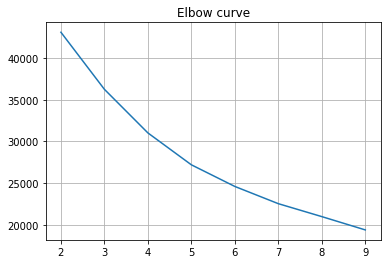

In [ ]:
# Decide initial k cluster using elbow method
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

<Figure size 864x432 with 0 Axes>

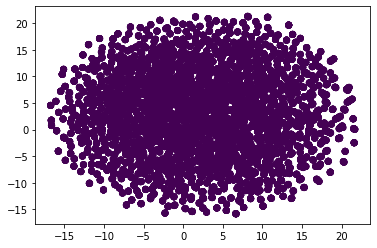

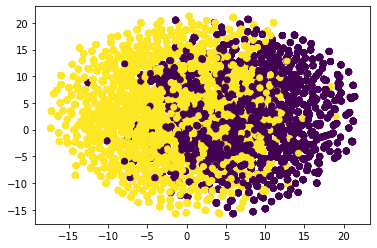

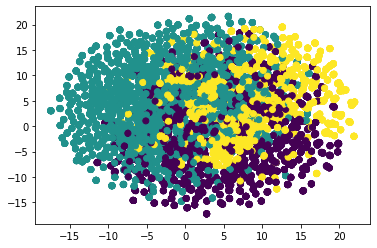

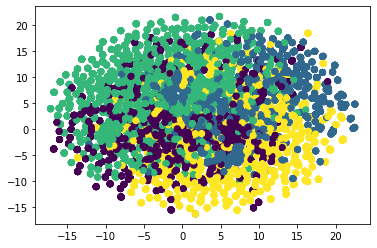

In [ ]:
# Adjust the figure size
plt.figure(figsize=(12,6))

for i in range(1,5):
  # Clustering
  kmeanspp = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
  kmeanspp = kmeanspp.fit(X)

  # Predict clusters
  C_kmeanspp = kmeanspp.predict(X)

  # Dimension reduction
  X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=10).fit_transform(X)
  fig, ax = plt.subplots()
  ax.scatter(X2D[:,0], X2D[:,1], c=C_kmeanspp)
  plt.show()

Note: The plots above tell us clustering plot for 1 cluster, 2 clusters, 3 clusters, and 4 clsuters respectively.

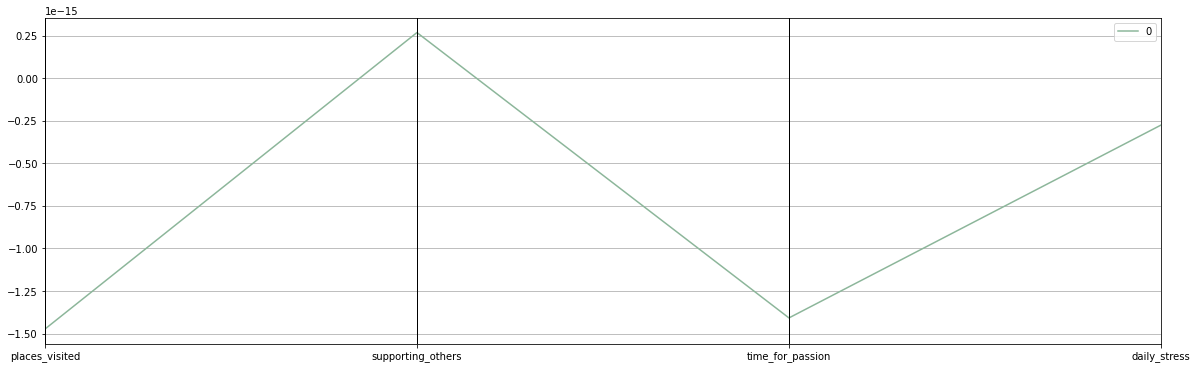

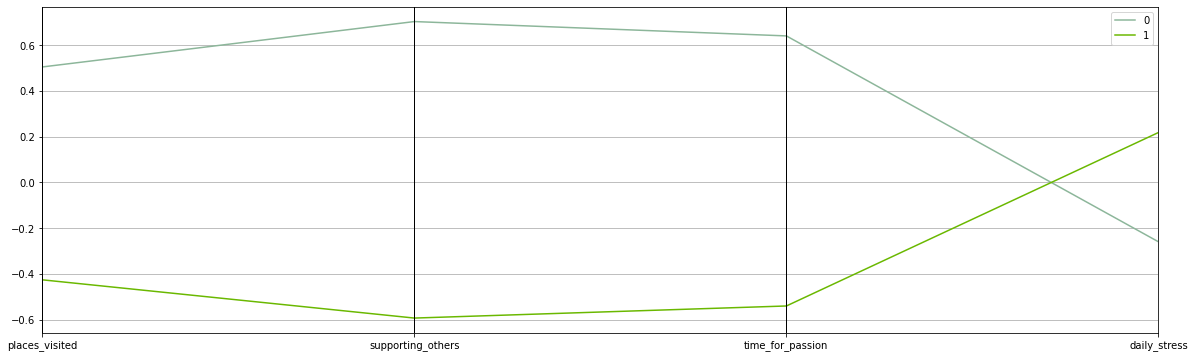

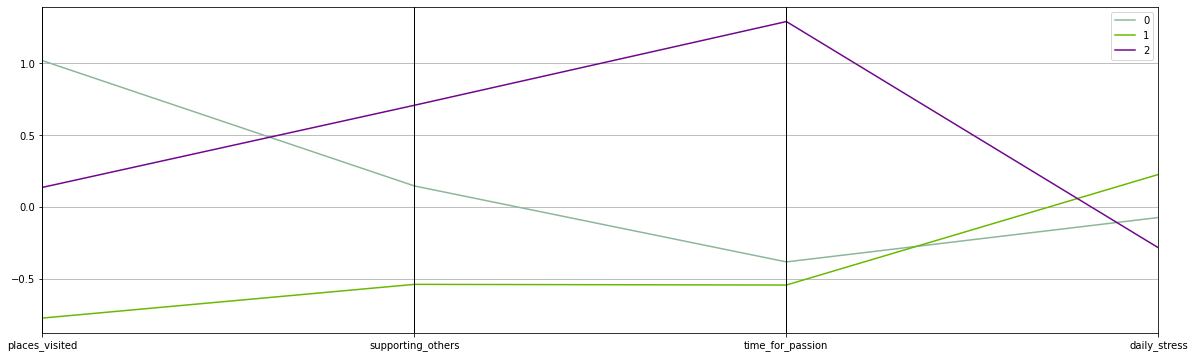

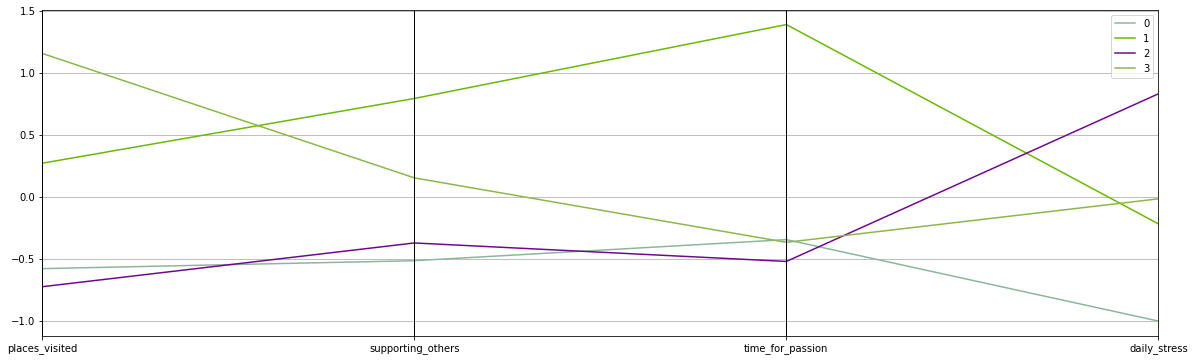

In [ ]:
# Interpretation Plot
cols = ['places_visited','supporting_others','time_for_passion','daily_stress']

for i in range(1,5):
  plt.figure(figsize=(20,6))
  kmeanspp = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
  kmeanspp = kmeanspp.fit(X)
  df_cluster_interpret = pd.DataFrame(kmeanspp.cluster_centers_, columns=cols)
  df_cluster_interpret['cluster'] = df_cluster_interpret.index
  pd.plotting.parallel_coordinates(df_cluster_interpret, 'cluster')
  plt.show()

Note: From the plots above, we will define k=2 as our initial cluster because the plot is more interpretable than other k.

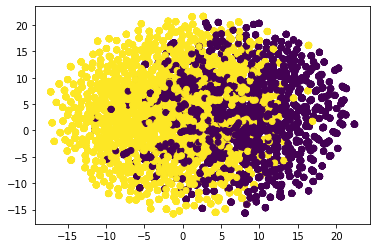

In [ ]:
# Clustering
kmeanspp = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, random_state = 10)
kmeanspp = kmeanspp.fit(X)

# Predict clusters
C_kmeanspp = kmeanspp.predict(X)

# Dimension reduction
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=10).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmeanspp)
plt.show()

## Interpretation

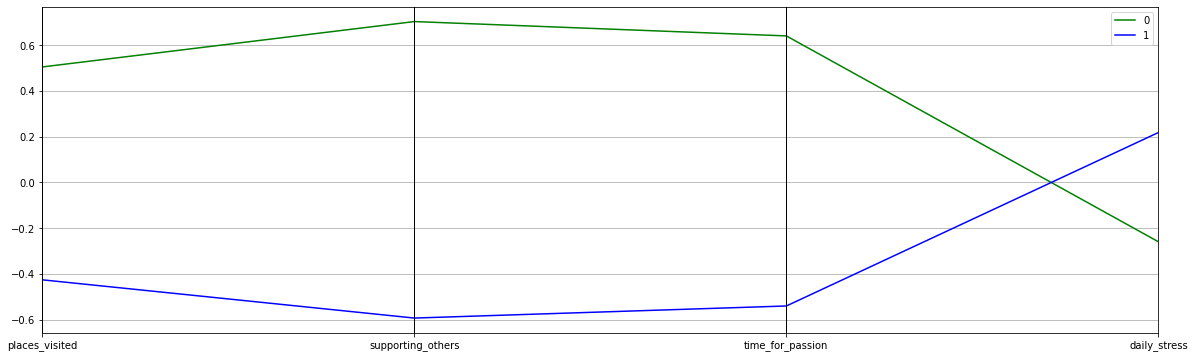

In [ ]:
# Adjust the figure size
plt.figure(figsize=(20,6))

# Interpretation Plot
cols = ['places_visited','supporting_others','time_for_passion','daily_stress']

kmeanspp = kmeanspp.fit(X)
df_cluster_interpret = pd.DataFrame(kmeanspp.cluster_centers_, columns=cols)
df_cluster_interpret['cluster'] = df_cluster_interpret.index
pd.plotting.parallel_coordinates(df_cluster_interpret, 'cluster', color=('g', 'b'))
plt.show()

<Figure size 1296x864 with 0 Axes>

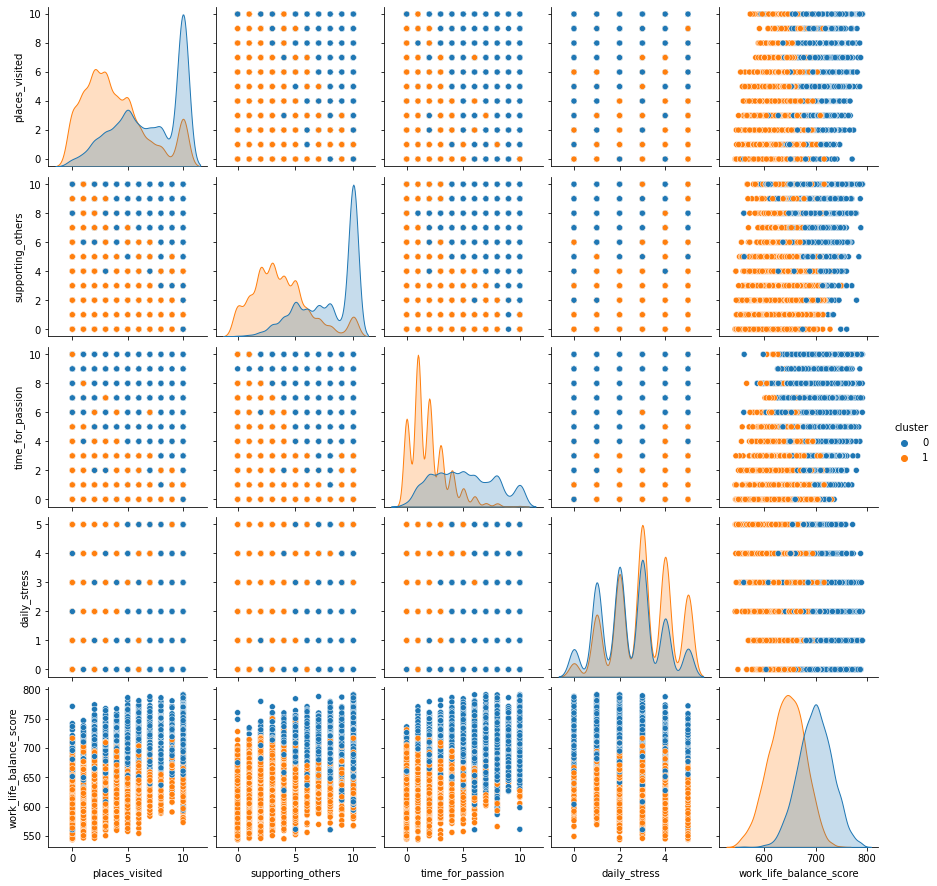

In [ ]:
# Adjust the figure size
plt.figure(figsize=(18,12))

# Add cluster column to identify clusters for each observation
df_cluster['cluster'] = kmeanspp.labels_

# Define df_cluster_final
df_cluster_final = df_cluster.copy()
df_cluster_final = df_cluster_final[['places_visited','supporting_others','time_for_passion','daily_stress',
                                     'work_life_balance_score','cluster']]

# Make pair plot                                    
sns.pairplot(df_cluster_final, hue="cluster")

In [ ]:
df_cluster_final['cluster'].value_counts()

1    7891
0    6636
Name: cluster, dtype: int64

In [ ]:
df_cluster_final.groupby('cluster').agg(
    mean_wlb = ('work_life_balance_score','mean')
)

,mean_wlb
cluster,
0,699.019726
1,643.540324


Note:
- In this case, we want to further analyze 2 clusters from the survey
- In the first cluster, the respondents have more places to visit, tend to help or support more people, have more time to do passionate activites, and have less daily stress. We can say this cluster is formed by the respondents that have better work life balance than the second cluster.
- In the second cluster, the respondents have less places to visit, tend to help or support less people, have less time to do passionate activites, and thus have more daily stress. Conversly, this cluster is formed by the respondents that have worse work life balance than the first cluster.